# BIA 6305ACA Preparation/Analysis for Big Data Fall 2017
## Assignment 3
## Notebook 1
### Stuent:  Leonardo Ji
### 1/25/2018

### Business Objective:
#### Submit: Create an ipython notebook that a student could use to learn about the data munging examples covered in the three videos (html)
#### Submit: data set used for data munging/analysis
* Script should include code blocks that represent data analysis/data munging
* Script should provide code that supports the import/export of data into/out of the ipython notebook
* Script should include all comments to explain what the code block is doing

In [96]:
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 15000) #important for getting all the text
import seaborn as sns
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

In [97]:
cd C:\\Users\\lj015625\\Desktop\\Big Data\\Week3

C:\Users\lj015625\Desktop\Big Data\Week3


### Kaggle Titianic Dataset
https://www.kaggle.com/c/titanic/data

In [98]:
titanic = pd.read_csv("train.csv", sep=",", encoding = 'utf8')

In [99]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
# designate target variable name
targetName = 'Survived'
targetSeries = titanic[targetName]
targetSeries.unique()

array([0, 1], dtype=int64)

In [101]:
#remove target from current location and insert in collum 0
del titanic[targetName]
titanic.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
titanic.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Feature column types.

In [102]:
titanic.dtypes

Survived         int64
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Data Wrangling

In [103]:
# Strip any spaces
for col in titanic.columns[2:]:
    dType = titanic[col].dtype
    # discretize (create dummies) for all categorical columns
    if dType == object:
        titanic[col] = titanic[col].str.strip()

#### Age, Cabin, Embarked columns contain nan.

In [104]:
titanic.isnull().any()

Survived       False
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [105]:
titanic.isnull().sum()

Survived         0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Replace Age with means by name initials

In [106]:
titanic['Initial']=0
for i in titanic:
    titanic['Initial']=titanic.Name.str.extract('([A-Za-z]+)\.',expand=False) #lets extract the Salutations

titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [107]:
titanic.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [108]:
## Assigning the NaN Values with the Ceil values of the mean ages
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age']=36
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age']=5
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Other'),'Age']=46

In [109]:
titanic.Age.isnull().any() #So no null values left finally 

False

#### Drop two rows of missing Embarked column

In [110]:
titanic = titanic.dropna(subset=['Embarked'], how='all')

In [111]:
titanic.Embarked.isnull().any()

False

#### Drop Cabin columns because there are too many rows with missing data

In [112]:
titanic = titanic.drop(['Cabin'], axis=1)

In [113]:
titanic.isnull().sum()

Survived       0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Initial        0
dtype: int64

### Exploratory Data Analysis 
Target variable is survived feature. It is a binary feaure 61.8% did not survive, and 38.2% survived. 

In [114]:
groupby = titanic.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)

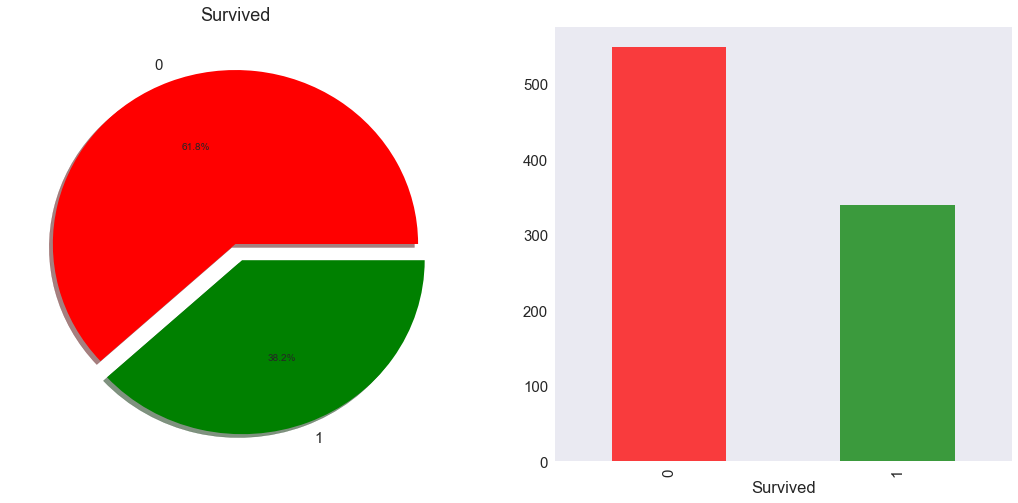

In [115]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic['Survived'].value_counts().plot.pie(colors=['red', 'green'],explode=[0, 0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

targetEDA.plot(kind='bar', grid=False, color=['red', 'green'], alpha=0.75, ax=ax[1])

#### Strong correlations between Pclass, Sex, Age to Survived

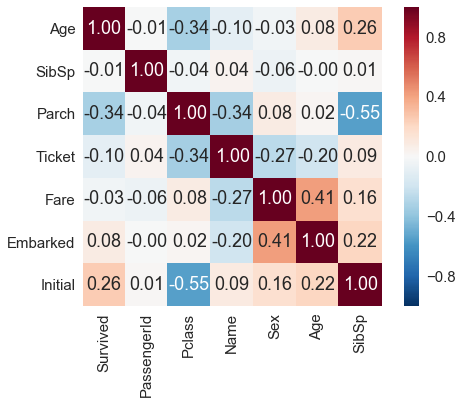

In [116]:
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(titanic.corr(), 
            annot=True,
            cbar=True,
            square=True,
            fmt='.2f',
            yticklabels=titanic.columns.values,
            xticklabels=titanic.columns.values)
plt.show()

#### More female survived than male.

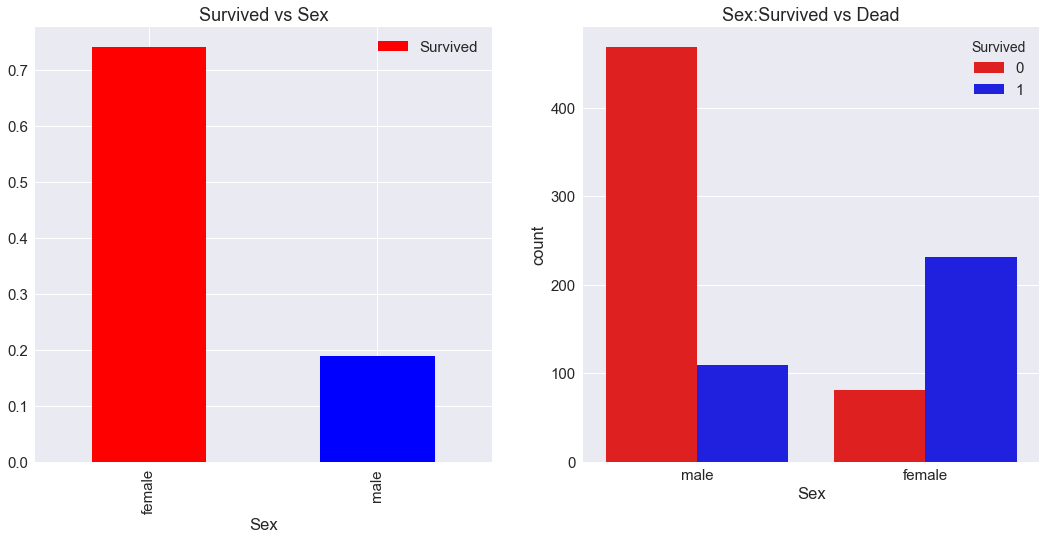

In [117]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(color=['red', 'blue'], ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', palette=['red', 'blue'], data=titanic, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### More higher Pclass survived than lower Pclass.

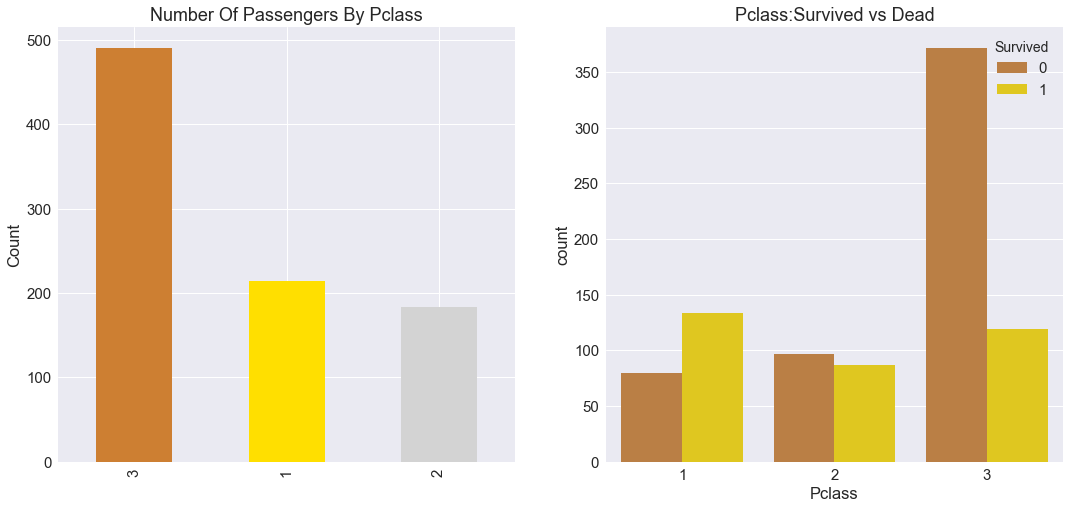

In [118]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived', palette=['#CD7F32','#FFDF00','#D3D3D3'], data=titanic,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

#### More younger person survived over all Pclass.  Lower Pclass means only younger person survived.

In [119]:
titanic['Age'].describe()

count    889.000000
mean      29.796592
std       13.249702
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

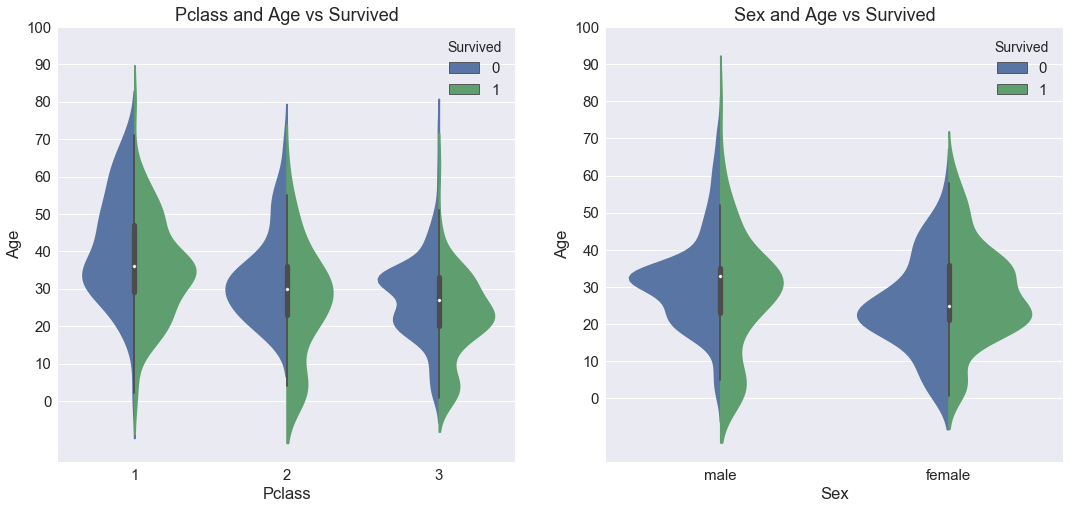

In [120]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=titanic,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Save the cleaned data in csv and xlsx format

In [121]:
titanic.to_csv("cleanedTitanic.csv", encoding='utf-8', index = False)

In [122]:
titanic.to_excel("cleanedTitanic.xlsx", encoding='utf-8', index = False)

### Summary
* The code performed data wrangling on Titanic dataset. We filled missing Age data with mean age by name initials.  We dropped rows with missing Embarked data.  We dropped Cabin column because there are too many missing data.  
* The notebook analyzed Sex, Pclass, Age features correlated to the target feature Survived.
* The code read Titanic train.csv and export cleaned data in CSV or Excel format.

# END